In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
import missingno as mso
from imblearn.over_sampling import SMOTE

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
print(data.shape)

(614, 13)


In [10]:
data.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [12]:
data.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

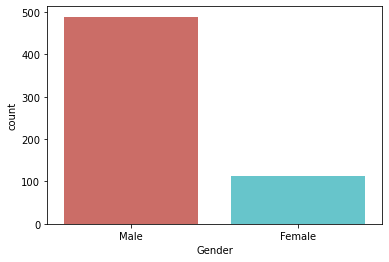

In [13]:
sns.countplot(x="Gender", data=data, palette="hls")
plt.show()

In [15]:
countMale = len(data[data.Gender == 'Male'])
countFemale = len(data[data.Gender == 'Female'])
countNull = len(data[data.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(data.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(data.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column

In [16]:
data.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

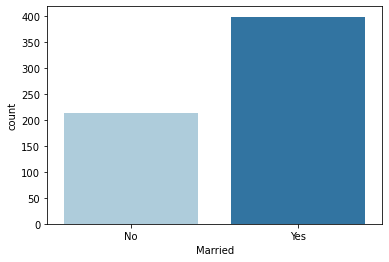

In [18]:
sns.countplot(x="Married", data=data, palette="Paired")
plt.show()

In [19]:
countMarried = len(data[data.Married == 'Yes'])
countNotMarried = len(data[data.Married == 'No'])
countNull = len(data[data.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(data.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(data.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


Education

In [20]:
data.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

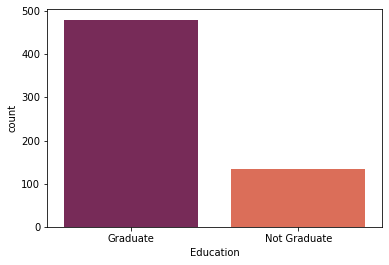

In [21]:
sns.countplot(x="Education", data=data, palette="rocket")
plt.show()

In [22]:
countGraduate = len(data[data.Education == 'Graduate'])
countNotGraduate = len(data[data.Education == 'Not Graduate'])
countNull = len(data[data.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(data.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(data.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


Self Employed

In [23]:
data.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

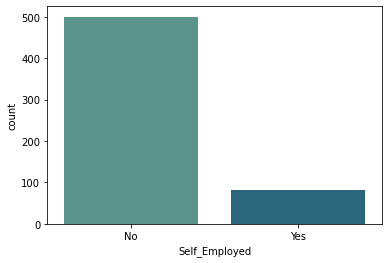

In [24]:
sns.countplot(x="Self_Employed", data=data, palette="crest")
plt.show()

In [25]:
countNo = len(data[data.Self_Employed == 'No'])
countYes = len(data[data.Self_Employed == 'Yes'])
countNull = len(data[data.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(data.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(data.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

Credit History

In [26]:
data.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

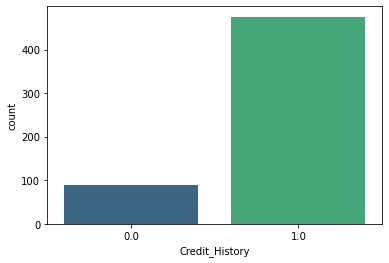

In [27]:
sns.countplot(x="Credit_History", data=data, palette="viridis")
plt.show()

In [28]:
count1 = len(data[data.Credit_History == 1])
count0 = len(data[data.Credit_History == 0])
countNull = len(data[data.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(data.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(data.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

Property Area

In [29]:
data.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

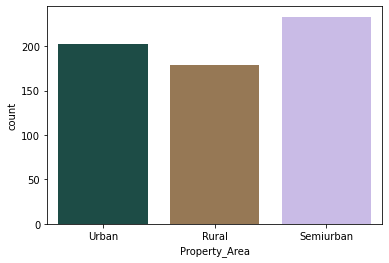

In [30]:
sns.countplot(x="Property_Area", data=data, palette="cubehelix")
plt.show()

In [31]:
countUrban = len(data[data.Property_Area == 'Urban'])
countRural = len(data[data.Property_Area == 'Rural'])
countSemiurban = len(data[data.Property_Area == 'Semiurban'])
countNull = len(data[data.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(data.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(data.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(data.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

Loan Status

In [32]:
data.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

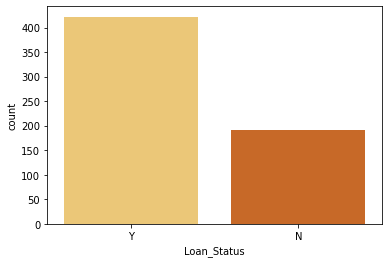

In [33]:
sns.countplot(x="Loan_Status", data=data, palette="YlOrBr")
plt.show()

In [34]:
countY = len(data[data.Loan_Status == 'Y'])
countN = len(data[data.Loan_Status == 'N'])
countNull = len(data[data.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(data.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(data.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

Loan Amount Term

In [35]:
data.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

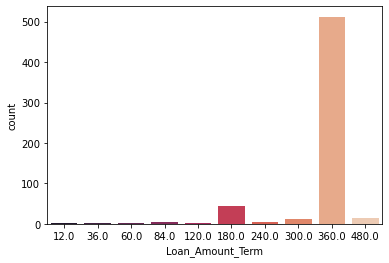

In [36]:
sns.countplot(x="Loan_Amount_Term", data=data, palette="rocket")
plt.show()

In [37]:
count12 = len(data[data.Loan_Amount_Term == 12.0])
count36 = len(data[data.Loan_Amount_Term == 36.0])
count60 = len(data[data.Loan_Amount_Term == 60.0])
count84 = len(data[data.Loan_Amount_Term == 84.0])
count120 = len(data[data.Loan_Amount_Term == 120.0])
count180 = len(data[data.Loan_Amount_Term == 180.0])
count240 = len(data[data.Loan_Amount_Term == 240.0])
count300 = len(data[data.Loan_Amount_Term == 300.0])
count360 = len(data[data.Loan_Amount_Term == 360.0])
count480 = len(data[data.Loan_Amount_Term == 480.0])
countNull = len(data[data.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(data.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(data.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(data.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


As can be seen from the results, the 360 days loan duration is the most popular compared to others.

Describe Numerical Variable 

In [38]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Histogram Distribution

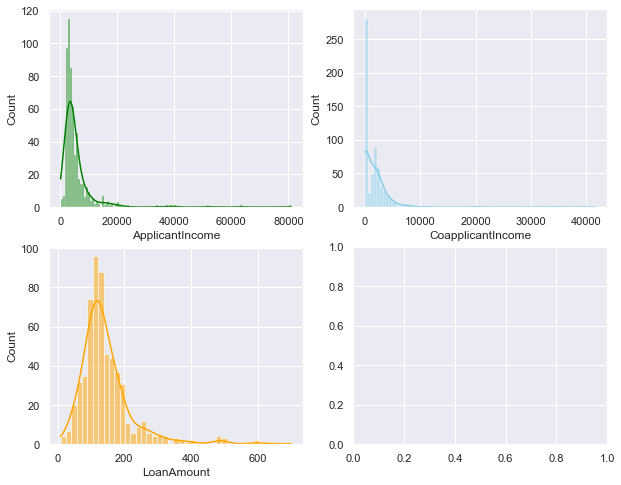

In [39]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

Violin Plot

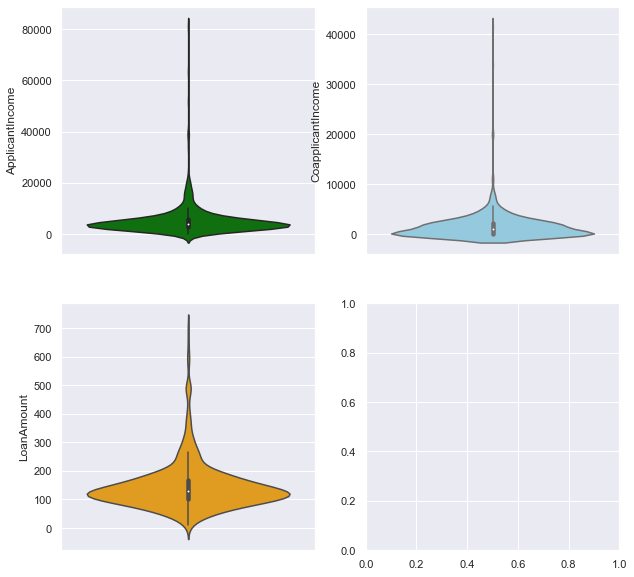

In [41]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=data, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=data, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=data, y="LoanAmount", ax=axs1[1, 0], color='orange');

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers

Heatmap

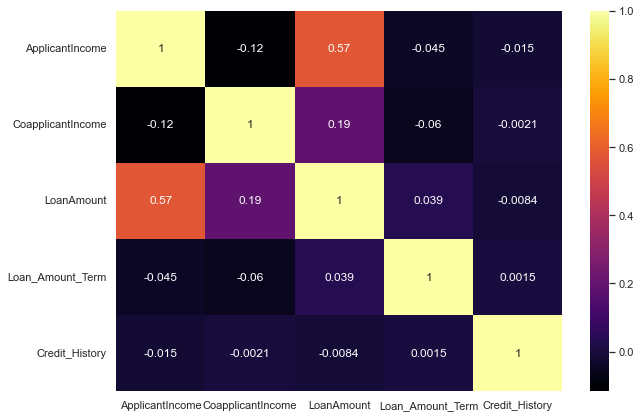

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

 Categorical

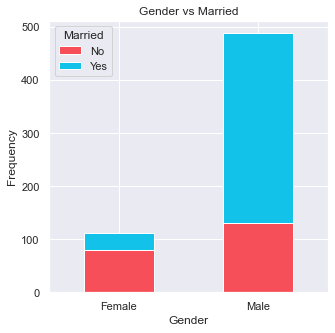

In [44]:
pd.crosstab(data.Gender,data.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

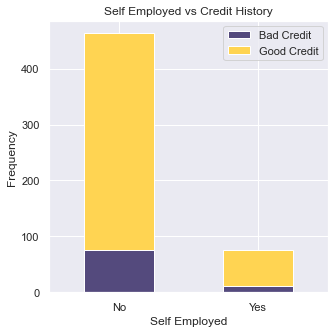

In [45]:
pd.crosstab(data.Self_Employed,data.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

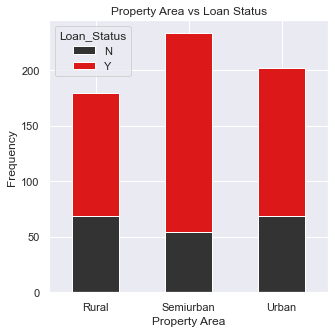

In [46]:
pd.crosstab(data.Property_Area,data.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

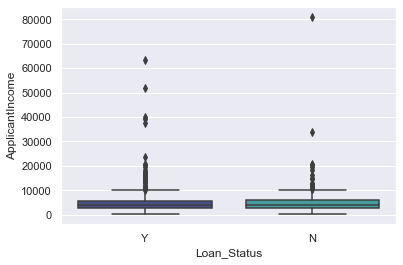

In [47]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=data, palette="mako");

It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

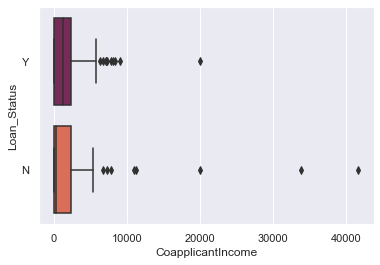

In [48]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=data, palette="rocket")

 It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

Numerical

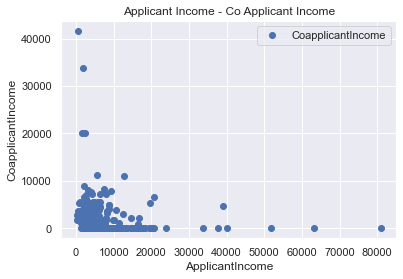

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915661, pvalue=1.4609839484240346e-40)


In [50]:
data.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', data['ApplicantIncome'].corr(data['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(data['ApplicantIncome'], data['CoapplicantIncome']))

There is negative correlation between Applicant income and Co Applicant Income.
The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46

Null Values

In [51]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

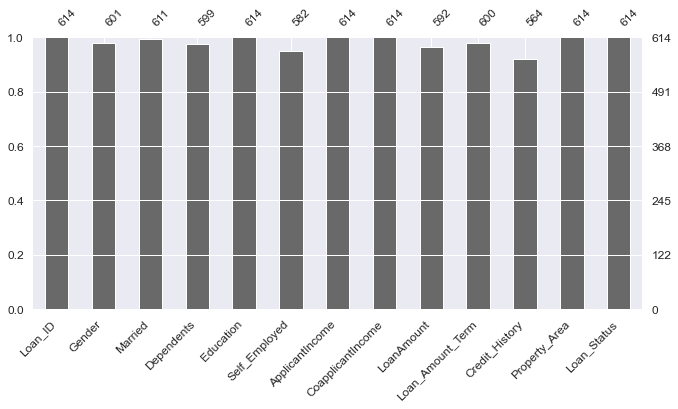

In [53]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(data, ax = axz, fontsize = 12);

In [54]:
data = data.drop(['Loan_ID'], axis = 1)

In [55]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [56]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

 One-hot Encoding 

In [59]:
data = pd.get_dummies(data)

# Drop columns
data = data.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
data.rename(columns=new, inplace=True)

Since there are outliers, the outliers will be removed.

In [60]:
# Square Root Transformation

data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

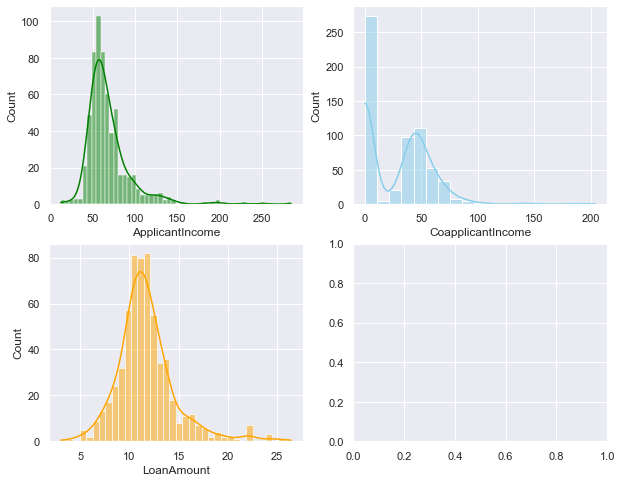

In [61]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

 Features Separating 

In [62]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

SMOTE Technique

In [63]:
X, y = SMOTE().fit_resample(X, y)

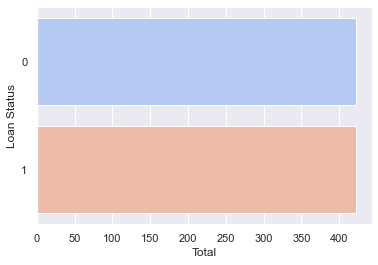

In [64]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=data, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

Data Normalization

In [65]:
X = MinMaxScaler().fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 Logistic Regression

In [67]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79        86
           1       0.74      0.99      0.85        83

    accuracy                           0.82       169
   macro avg       0.86      0.83      0.82       169
weighted avg       0.86      0.82      0.82       169

[[57 29]
 [ 1 82]]
LR accuracy: 82.25%


K-Nearest Neighbour (KNN)

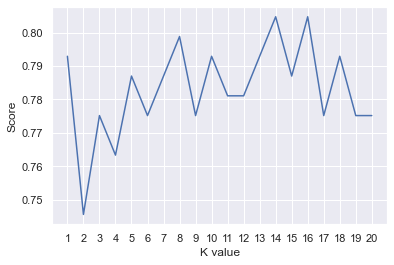

KNN best accuracy: 80.47%


In [68]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

SVM

In [69]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78        86
           1       0.73      0.99      0.84        83

    accuracy                           0.82       169
   macro avg       0.86      0.82      0.81       169
weighted avg       0.86      0.82      0.81       169

[[56 30]
 [ 1 82]]
SVC accuracy: 81.66%


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 Naive Bayes

In [70]:
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        86
           1       0.69      0.98      0.81        83

    accuracy                           0.78       169
   macro avg       0.83      0.78      0.77       169
weighted avg       0.83      0.78      0.77       169

[[50 36]
 [ 2 81]]
Categorical Naive Bayes accuracy: 77.51%


 Gaussian NB

In [71]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       0.96      0.57      0.72        86
           1       0.69      0.98      0.81        83

    accuracy                           0.77       169
   macro avg       0.82      0.77      0.76       169
weighted avg       0.83      0.77      0.76       169

[[49 37]
 [ 2 81]]
Gaussian Naive Bayes accuracy: 76.92%


Decision Tree

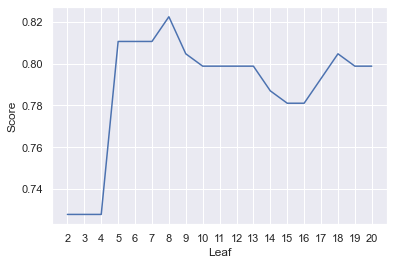

Decision Tree Accuracy: 82.25%


In [72]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Random Forest

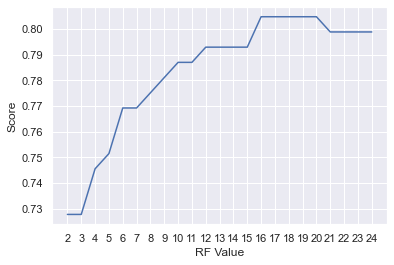

Random Forest Accuracy:  80.47%


In [73]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Gradient Boosting

In [74]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [75]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [76]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=20, n_estimators=300,
                           subsample=0.5)
0.8354723707664885
{'subsample': 0.5, 'n_estimators': 300, 'max_leaf_nodes': 20, 'max_depth': 4}
2


In [77]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        86
           1       0.81      0.92      0.86        83

    accuracy                           0.85       169
   macro avg       0.86      0.85      0.85       169
weighted avg       0.86      0.85      0.85       169

[[68 18]
 [ 7 76]]
Gradient Boosting accuracy: 85.21%


Model Comparison

In [78]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc1*100, NBAcc2*100, DTAcc*100, 
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
7,Gradient Boost,85.207101
0,Logistic Regression,82.248521
5,Decision Tree,82.248521
2,SVM,81.656805
1,K Neighbors,80.473373
6,Random Forest,80.473373
3,Categorical NB,77.514793
4,Gaussian NB,76.923077
